In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
from fastai.vision.all import *

In [4]:
path = untar_data(URLs.PETS)

In [5]:
path.ls()

(#2) [Path('/Users/mton/.fastai/data/oxford-iiit-pet/images'),Path('/Users/mton/.fastai/data/oxford-iiit-pet/annotations')]

In [6]:
!ls -a

.                                 README.md
..                                copilotTest.js
.DS_Store                         fast-ai-dog-or-cat-tutorial.ipynb
.git                              helloworld.ipynb
.ipynb_checkpoints                helloworld.py
.venv                             tutorial_play_the_game.ipynb
.vscode


In [7]:
files = get_image_files(path/"images")
len(files)

7390

In [22]:
# type: ignore
# ?? returns source for any function
??get_image_files
# ? returns commment for any function
?get_image_files
# doc(func) gets document links
doc(get_image_files)

get_image_files(path, recurse=True, folders=None)
Get image files in `path` recursively, only in `folders`, if specified.

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


Signature: get_image_files(path, recurse=True, folders=None)
Docstring: Get image files in `path` recursively, only in `folders`, if specified.
File:      /opt/homebrew/lib/python3.10/site-packages/fastai/data/transforms.py
Type:      function


In [8]:
files[0], files[6]

(Path('/Users/mton/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_167.jpg'),
 Path('/Users/mton/.fastai/data/oxford-iiit-pet/images/Birman_167.jpg'))

In [9]:
def label_func(f):
    return f[0].isupper()

In [10]:
files[0].name
#label_func(files)

'Egyptian_Mau_167.jpg'

In [11]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

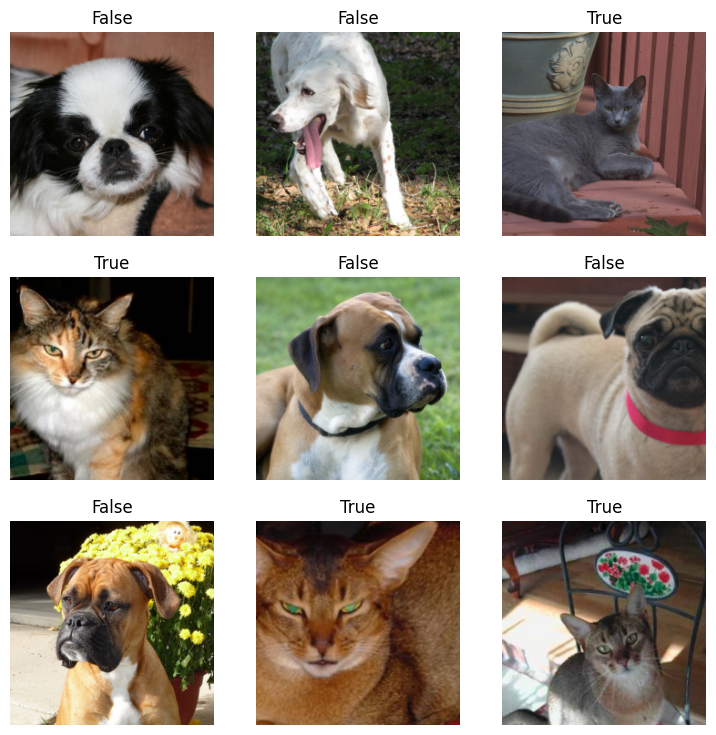

In [13]:
dls.show_batch()

In [1]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

NameError: name 'vision_learner' is not defined

In [17]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()

dls = ImageDataLoaders.from_name_func(path, get_image_files(path), valid_pct=0.2, seed=42, label_func=is_cat, item_tfms=Resize(224))
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)


epoch,train_loss,valid_loss,error_rate,time


[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNati

KeyboardInterrupt: 